In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [329]:
# Load the dataset
df=pd.read_csv('train.csv')

In [330]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print(correlation_with_target.head(25))  # Top 25 features


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
Name: SalePrice, dtype: float64


In [331]:
selected_features = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                        '1stFlrSF', 'FullBath', 'YearBuilt',
                        'TotRmsAbvGrd', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea','LotFrontage',
                        'LotArea', 'GarageArea', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2','2ndFlrSF','GarageYrBlt',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']]
Y = df['SalePrice']


In [332]:
selected_features['Grlivarea2']=selected_features['GrLivArea']**2
selected_features['totalarea2']=selected_features['LotArea']**2
selected_features['1stFlrSF2']=selected_features['1stFlrSF']**2
selected_features['OverallQual2']=selected_features['OverallQual']**2
selected_features['ScreenPorch2']=selected_features['ScreenPorch']**2
selected_features['GarageArea2']=selected_features['GarageArea']**2
selected_features['GerageCars2']=selected_features['GarageCars']**2
selected_features['TotalBsmtSF2']=selected_features['TotalBsmtSF']**2
selected_features['FullBath2']=selected_features['FullBath']**2
selected_features['MasVnrArea2']=selected_features['MasVnrArea']**2
selected_features['BsmtFinSF12']=selected_features['BsmtFinSF1']**2
selected_features["EnclosedPorch2"]=selected_features['EnclosedPorch']**2





/var/folders/6n/ndsjwkks0kn541czwk8ff3hc0000gn/T/ipykernel_65165/2532975488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Grlivarea2']=selected_features['GrLivArea']**2
/var/folders/6n/ndsjwkks0kn541czwk8ff3hc0000gn/T/ipykernel_65165/2532975488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['totalarea2']=selected_features['LotArea']**2
/var/folders/6n/ndsjwkks0kn541czwk8ff3hc0000gn/T/ipykernel_65165/2532975488.py:3: SettingWithCopyWarning: 
A value is trying t

In [333]:
def one_hot_encode_df(df):
    return pd.get_dummies(df, drop_first=True) 


In [334]:
selected_features= one_hot_encode_df(selected_features)

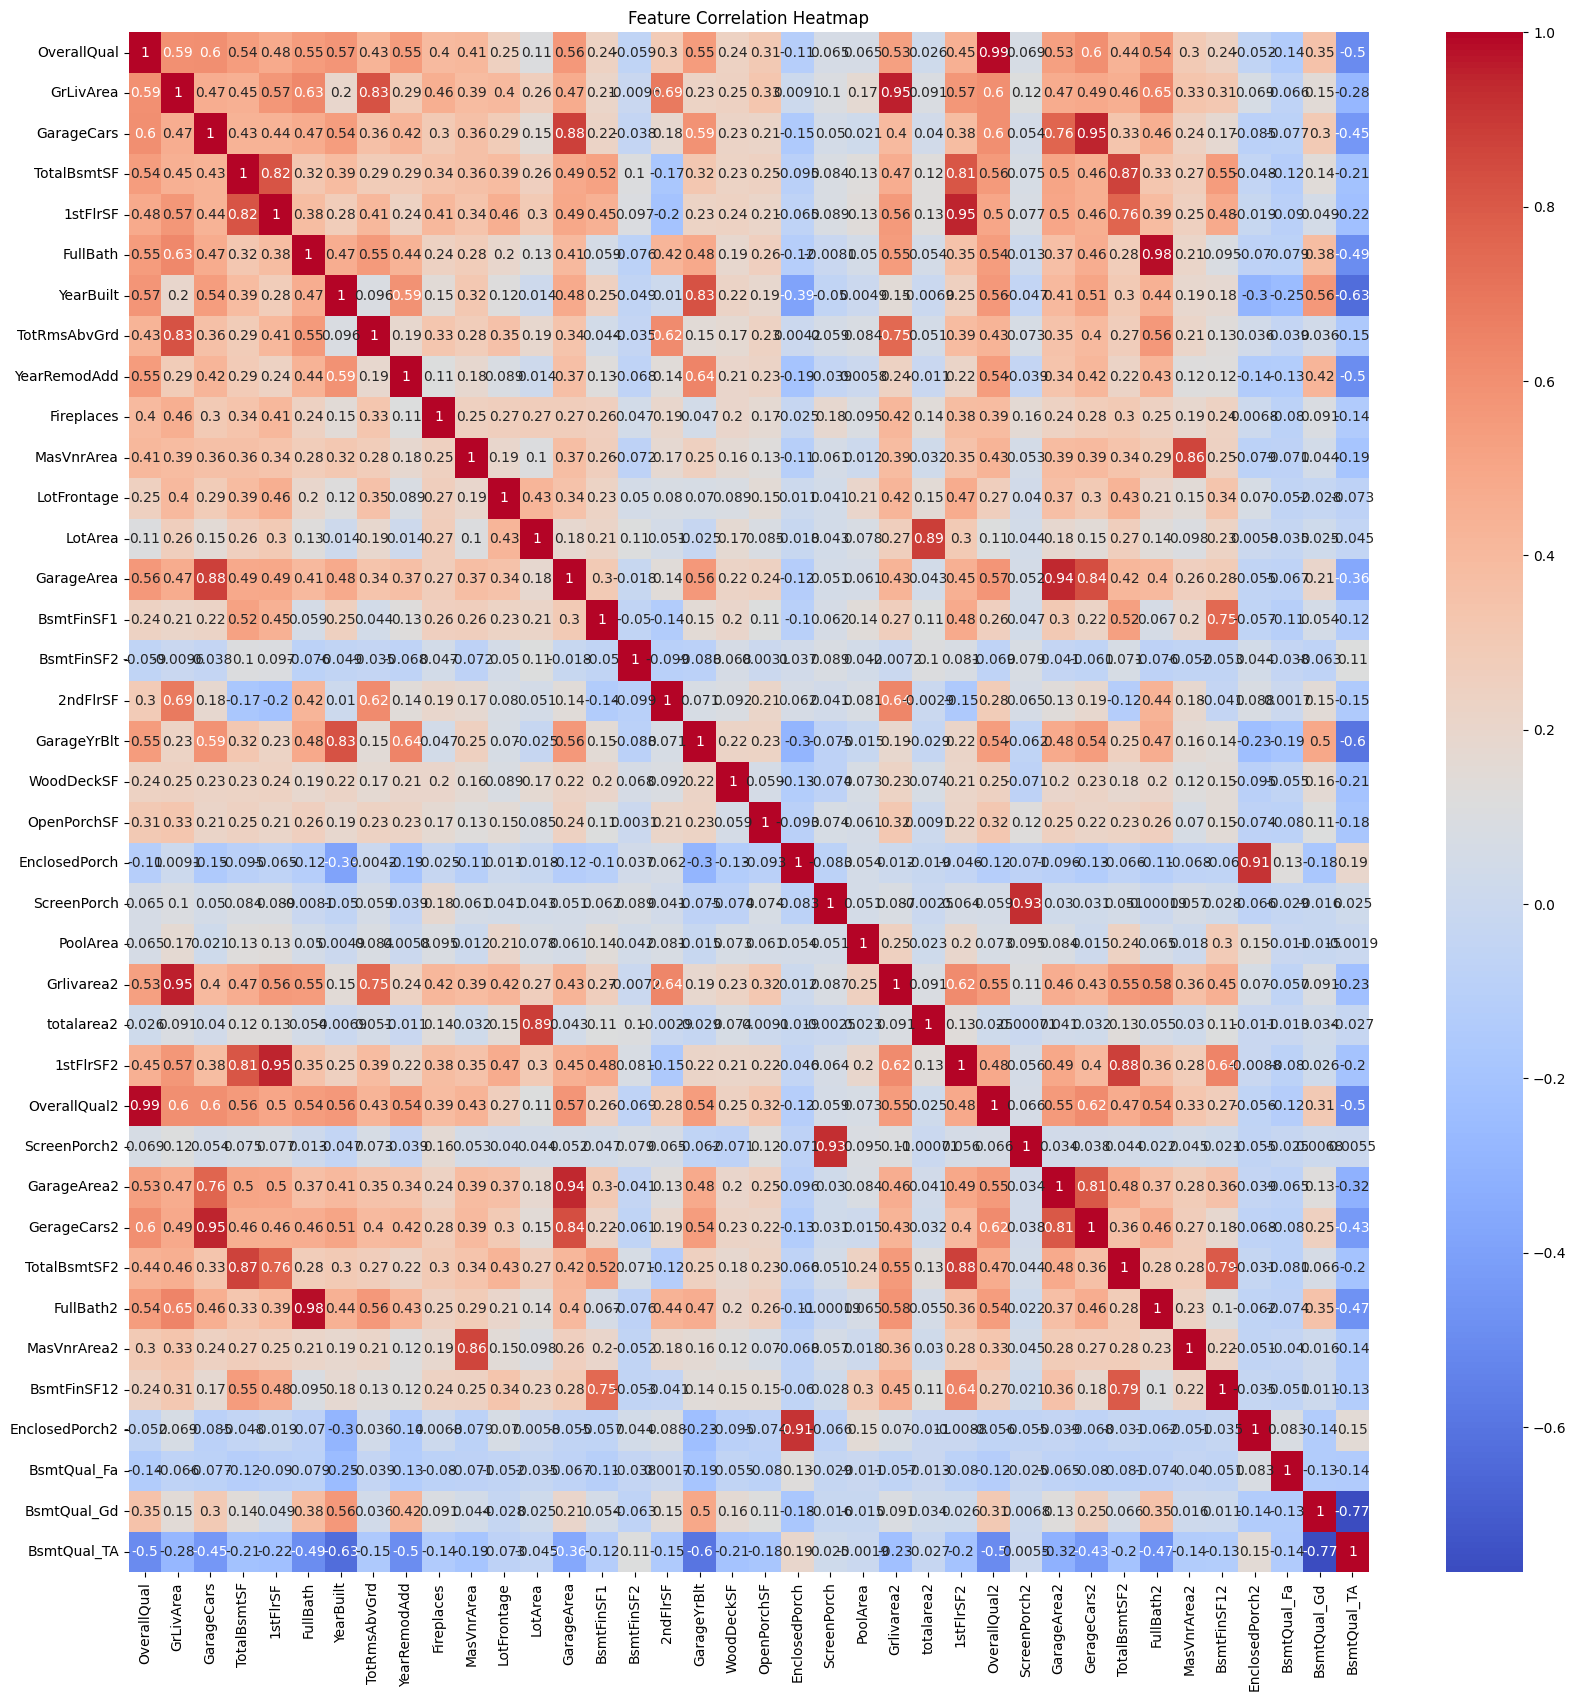

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = selected_features.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [336]:
selected_features.isnull().values.any()
# Fill missing values with the mean of each column
selected_features.fillna(selected_features.mean(), inplace=True)

In [337]:
X=selected_features

In [338]:
def feature_scaling(X_train, X_test):
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    for col in X_train.columns:
        mean = X_train[col].mean()
        std = X_train[col].std()
        X_train_scaled[col] = (X_train[col] - mean) / (std + 1e-8)
        X_test_scaled[col] = (X_test[col] - mean) / (std + 1e-8)  
    return X_train_scaled, X_test_scaled

In [339]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

y_train_log = np.log1p(y_train)  
y_test_log = np.log1p(y_test)


In [340]:
X_train_scaled, X_test_scaled = feature_scaling(X_train, X_test)

In [443]:
#for training Data
X_b=np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
# for testing data
X_b_test=np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
#for weights and bias
theta=np.zeros(X_b.shape[1])

In [444]:
#predictions:
def predict(X, theta):
    return np.dot(X, theta)

In [445]:
#compute
def compute_cost(X,Y,theta):
    n=len(Y)
    prediction=predict(X, theta)
    cost = (1/(2*n)) * np.sum((prediction - Y) ** 2)
    return cost



In [446]:
def GradientDescent(X,Y,theta,learning_rate,epochs,lam):
    n=len(Y)
    gradient=np.zeros(theta.shape)
    regu=theta.copy()
    regu[0]=0  
    cost_history=[]
    for epoch in range(epochs):
        predictions=predict(X,theta)
        errors=predictions-Y
        gradient=(1/n) * np.dot(X.T, errors)+ (lam/n) * regu
        theta-=(learning_rate * gradient)
        cost=compute_cost(X, Y, theta)
        cost_history.append(cost)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Cost: {cost:.10f}')
    return theta, cost_history

In [447]:
learning_rate = 0.01
lam=0.01
epochs = 1000
theta_final, cost_history = GradientDescent(X_b, y_train_log, theta, learning_rate, epochs,lam)

Epoch 0, Cost: 70.9923827647
Epoch 100, Cost: 9.5153244817
Epoch 200, Cost: 1.2840037520
Epoch 300, Cost: 0.1807384953
Epoch 400, Cost: 0.0326622258
Epoch 500, Cost: 0.0126554093
Epoch 600, Cost: 0.0098602268
Epoch 700, Cost: 0.0094028312
Epoch 800, Cost: 0.0092787898
Epoch 900, Cost: 0.0092128255


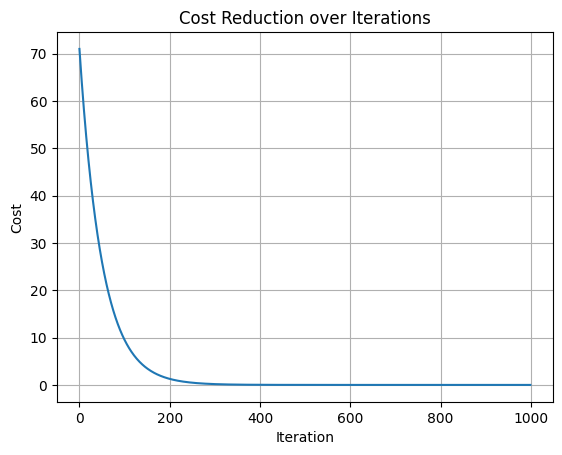

In [448]:
plt.plot(cost_history)
plt.title("Cost Reduction over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [449]:
y_pred_log = predict(X_b_test, theta_final)
predictions = np.expm1(y_pred_log)  # reverse the log transform

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Test MSE: {mse}")

print(f"Test RMSE: {rmse}")
print(f"Test R²: {r2}")



Test MSE: 776882475.3141823
Test RMSE: 27872.611562503113
Test R²: 0.8987158493225177


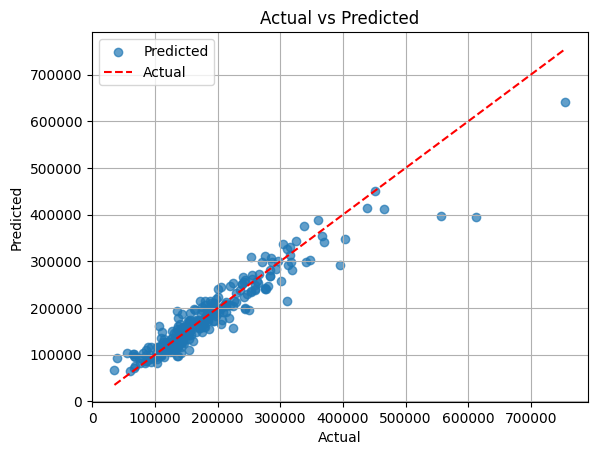

In [450]:
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.legend(['Predicted', 'Actual'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


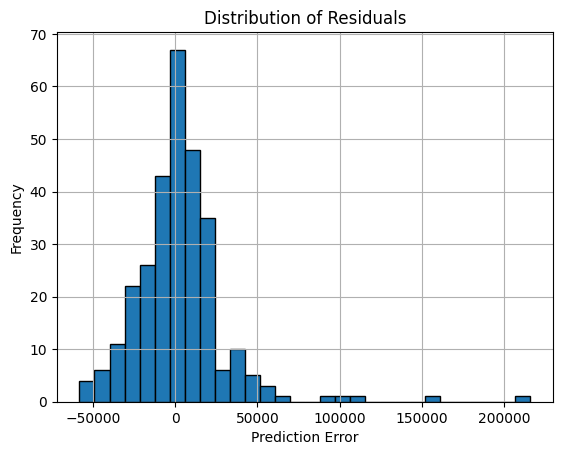

In [451]:
residuals = y_test - predictions
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()